                                                                                      Solution code_team_AKPK_NIT JAMSHEDPUR

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
dataset = pd.read_excel('Historical_data.xlsx')
dataset.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [3]:
dataset.shape

(23880, 17)

In [4]:
dataset.count()

customer_id                   23880
customer_age                  23403
job_type                      23880
marital                       23773
education                     23880
default                       23880
balance                       23603
housing_loan                  23880
personal_loan                 23767
communication_type            23880
day_of_month                  23880
month                         23880
last_contact_duration         23880
num_contacts_in_campaign      23784
num_contacts_prev_campaign    23880
prev_campaign_outcome         23880
term_deposit_subscribed       23880
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

In [6]:
dataset.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000


## Null Values Imputation

In [7]:
dataset.isnull().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

<AxesSubplot:xlabel='customer_age', ylabel='Count'>

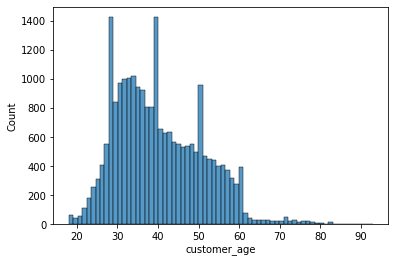

In [8]:
sns.histplot(data=dataset, x="customer_age")

In [9]:
# Replacing the null values in customer age column with mean customer age
from sklearn.impute import SimpleImputer
imp_age = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_age.fit(dataset.loc[:,["customer_age"]])
dataset.loc[:,["customer_age"]] = imp_age.transform(dataset.loc[:,["customer_age"]])

<AxesSubplot:xlabel='customer_age', ylabel='Count'>

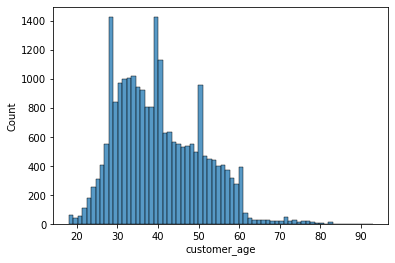

In [10]:
sns.histplot(data=dataset, x="customer_age")

<AxesSubplot:xlabel='marital', ylabel='Count'>

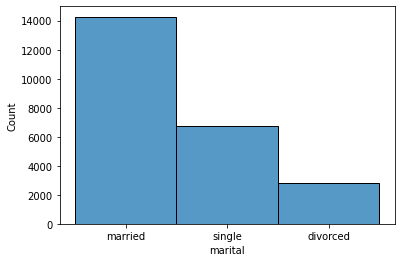

In [11]:
sns.histplot(data=dataset, x="marital")

In [12]:
# Replacing the null value in marital column with most frequent marital status of the given dataset
from sklearn.impute import SimpleImputer
imp_marital = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_marital.fit(dataset.loc[:,["marital"]])
dataset.loc[:,["marital"]] = imp_marital.transform(dataset.loc[:,["marital"]])

<AxesSubplot:xlabel='balance', ylabel='Count'>

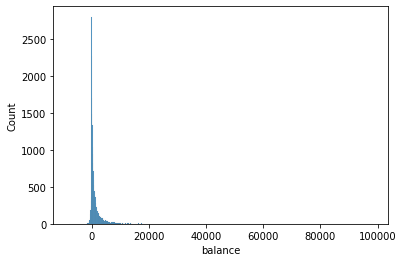

In [13]:
sns.histplot(data=dataset, x="balance")

In [14]:
# Replacing the null value in the balance column with the mean balance(Choosen the replacement by mean from strategy like mean, median and most frequent of sklearn's SimpleImputer)
from sklearn.impute import SimpleImputer
imp_balance = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_balance.fit(dataset.loc[:,["balance"]])
dataset.loc[:,["balance"]] = imp_balance.transform(dataset.loc[:,["balance"]])

<AxesSubplot:xlabel='personal_loan', ylabel='Count'>

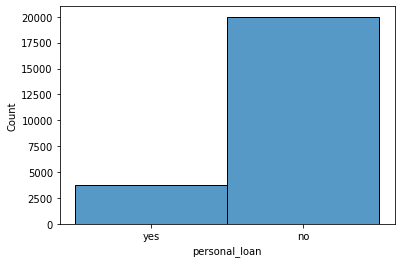

In [15]:
sns.histplot(data=dataset, x="personal_loan")

In [16]:
# Replacing the null value in Personal Loan Column with most frequent value of personal loan column
from sklearn.impute import SimpleImputer
imp_loan = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_loan.fit(dataset.loc[:,["personal_loan"]])
dataset.loc[:,["personal_loan"]] = imp_loan.transform(dataset.loc[:,["personal_loan"]])

<AxesSubplot:xlabel='num_contacts_in_campaign', ylabel='Count'>

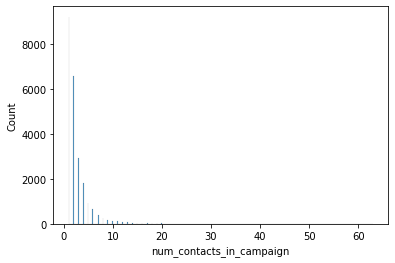

In [17]:
sns.histplot(data=dataset, x="num_contacts_in_campaign")

In [18]:
# Count of different values in the num_contacts_in_campaign column
dataset['num_contacts_in_campaign'].value_counts()

1.0     9211
2.0     6577
3.0     2940
4.0     1827
5.0      936
6.0      654
7.0      394
8.0      282
9.0      175
10.0     147
11.0     107
13.0      80
12.0      79
15.0      49
14.0      44
16.0      39
17.0      37
18.0      29
20.0      27
19.0      23
25.0      15
21.0      13
23.0      12
28.0      11
22.0      10
29.0       9
24.0       7
32.0       7
27.0       6
30.0       6
26.0       5
31.0       5
36.0       3
34.0       3
37.0       2
33.0       2
38.0       2
35.0       2
43.0       2
51.0       1
55.0       1
58.0       1
63.0       1
44.0       1
Name: num_contacts_in_campaign, dtype: int64

In [19]:
# Repalcing the null value in the num_contacts_in_campaign with most frequent value in num_contacts_in_campaign column
from sklearn.impute import SimpleImputer
imp_num_contacts = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_num_contacts.fit(dataset.loc[:,["num_contacts_in_campaign"]])
dataset.loc[:,["num_contacts_in_campaign"]] = imp_num_contacts.transform(dataset.loc[:,["num_contacts_in_campaign"]])

In [20]:
dataset.isnull().sum()

customer_id                   0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

## Data Visualization

<AxesSubplot:ylabel='marital'>

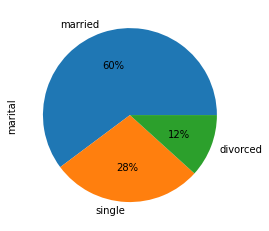

In [21]:
dataset['marital'].value_counts().plot(kind='pie', autopct='%1.0f%%')

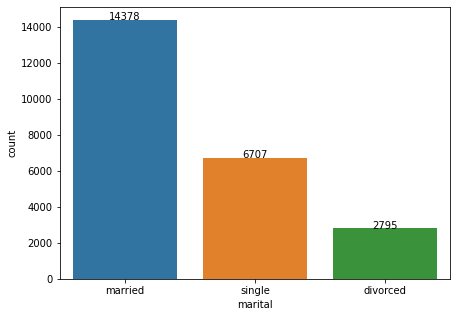

In [22]:
fig, ax1 = plt.subplots(figsize=(7,5))
graph = sns.countplot(ax=ax1, x='marital', data=dataset, order = dataset['marital'].value_counts().index)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        dataset['marital'].value_counts()[i],ha="center")
    i += 1

In [23]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

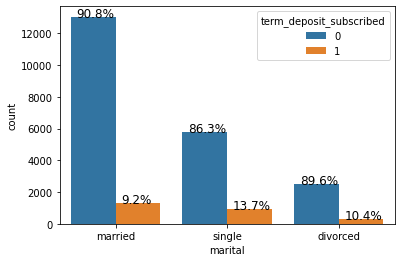

In [24]:
#count of marital status wrt to the term_deposit_subscribed 
graph = sns.countplot(data=dataset, x="marital", hue="term_deposit_subscribed", order = dataset['marital'].value_counts().index)
with_hue(graph, dataset.marital, 3, 2)

In [25]:
dataset_subscribed = dataset[dataset['term_deposit_subscribed'] == 1]

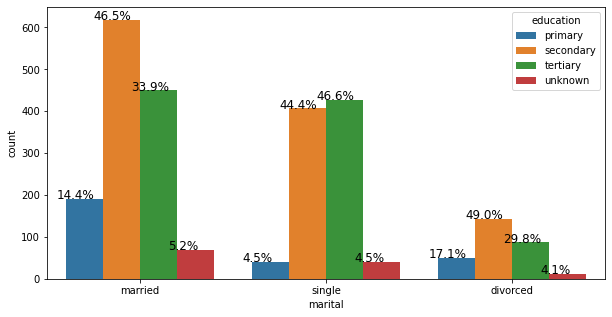

In [26]:
#count of marital status wrt to the term_deposit_subscribed
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(data=dataset_subscribed, x="marital", hue="education", order = dataset_subscribed['marital'].value_counts().index)
with_hue(graph, dataset_subscribed.marital, 3, 4)

In [27]:
# from the above data it can be visualised easily that the single marital status should be preferred over the rest for better conversion. It will be better to look for secondary and tertiary education qyualified people.

<AxesSubplot:ylabel='job_type'>

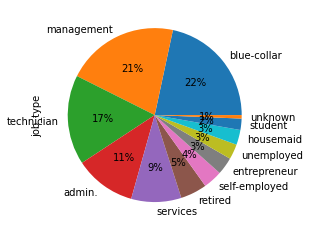

In [28]:
dataset['job_type'].value_counts().plot(kind='pie', autopct='%1.0f%%')

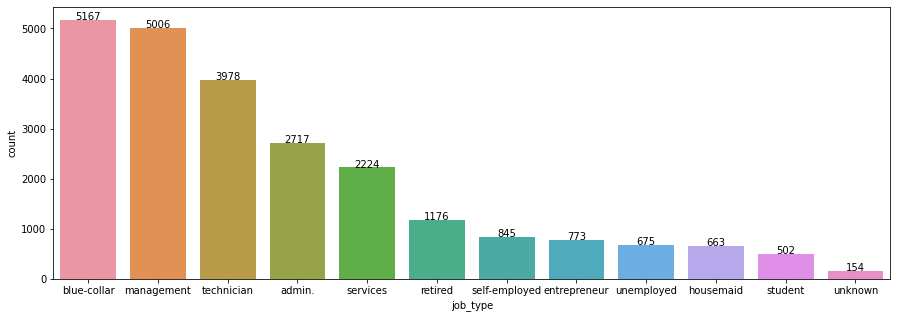

In [29]:
fig, ax1 = plt.subplots(figsize=(15,5))
graph = sns.countplot(ax=ax1, x='job_type', data=dataset, order = dataset['job_type'].value_counts().index)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        dataset['job_type'].value_counts()[i],ha="center")
    i += 1

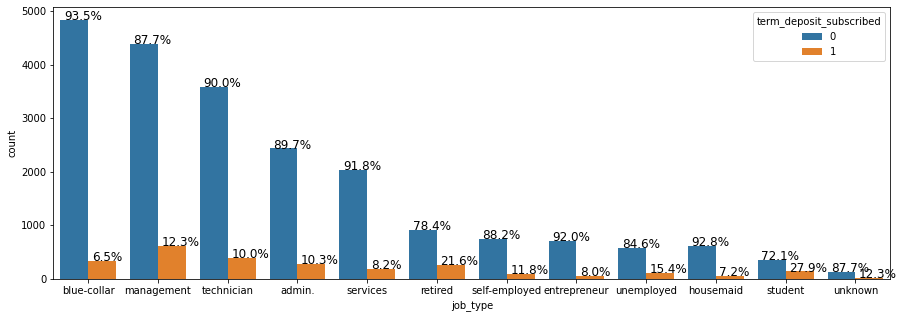

In [30]:
#count of job_type wrt to the term_deposit_subscribed column.
fig, ax1 = plt.subplots(figsize=(15,5))
graph = sns.countplot(ax=ax1, data=dataset, x="job_type", hue="term_deposit_subscribed", order = dataset['job_type'].value_counts().index)
with_hue(graph, dataset.job_type, 12, 2)

In [31]:
#Altough 'student' and 'retired' count in the historical dataset is less but it will be better as its subscribing rate is highest among all the job types.

<AxesSubplot:ylabel='education'>

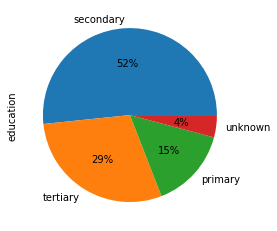

In [32]:
dataset['education'].value_counts().plot(kind='pie', autopct='%1.0f%%')

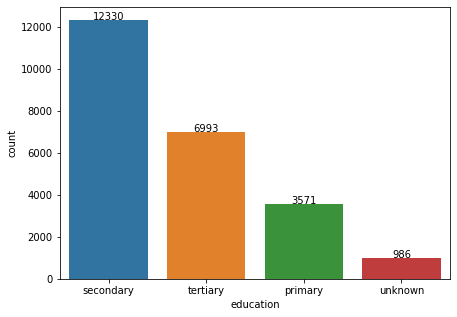

In [33]:
fig, ax1 = plt.subplots(figsize=(7,5))
graph = sns.countplot(ax=ax1, x='education', data=dataset, order = dataset['education'].value_counts().index)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        dataset['education'].value_counts()[i],ha="center")
    i += 1

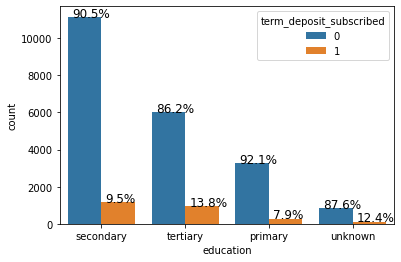

In [34]:
#count of educational qualification wrt to the term_deposit_subscribed column. 
graph = sns.countplot(data=dataset, x="education", hue="term_deposit_subscribed", order = dataset['education'].value_counts().index)
with_hue(graph, dataset.education, 4, 2)

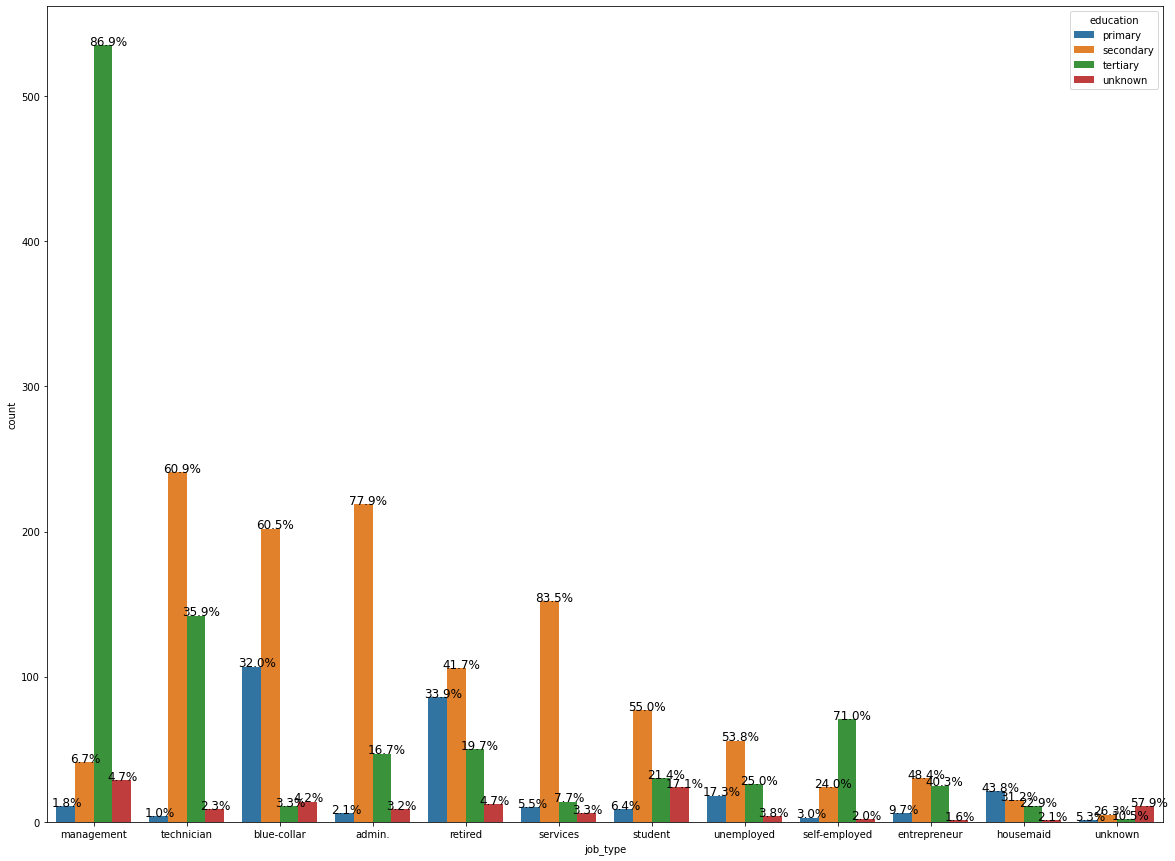

In [35]:
#count of educational qualification wrt to the term_deposit_subscribed column. 
fig, ax1 = plt.subplots(figsize=(20,15)) # for zooming the garph details fig size can be changed.
graph = sns.countplot(ax=ax1, data=dataset_subscribed, x="job_type", hue="education", order = dataset_subscribed['job_type'].value_counts().index)
with_hue(graph, dataset_subscribed.job_type, 12, 4)

In [36]:
# here we can visualise which type of the educational qualification should be chosed for the respective  job type for the campaign as follows:
"""
jobtype --- preferred education qualification
MANAGEMENT --- tertiary
TECHNICIAN--- secondary/tertiary
BLUE COLLAR --- primary/secondary
ADMIN --- secondary /tertiary
RETIRED ---primary/ secondary
SERVICES --- secondary
STUDENT --- secondary
UNEMPLOYED --- secondary
SELF EMPLOYED --- tertiary
ENTREPRENEUR --- secondary/tertiart
"""

'\njobtype --- preferred education qualification\nMANAGEMENT --- tertiary\nTECHNICIAN--- secondary/tertiary\nBLUE COLLAR --- primary/secondary\nADMIN --- secondary /tertiary\nRETIRED ---primary/ secondary\nSERVICES --- secondary\nSTUDENT --- secondary\nUNEMPLOYED --- secondary\nSELF EMPLOYED --- tertiary\nENTREPRENEUR --- secondary/tertiart\n'

<AxesSubplot:ylabel='default'>

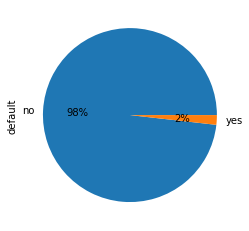

In [37]:
dataset['default'].value_counts().plot(kind='pie', autopct='%1.0f%%')

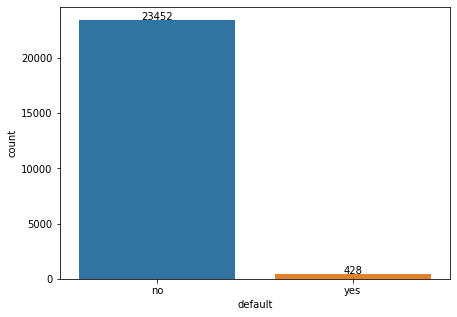

In [38]:
fig, ax1 = plt.subplots(figsize=(7,5))
graph = sns.countplot(ax=ax1, x='default', data=dataset, order = dataset['default'].value_counts().index)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        dataset['default'].value_counts()[i],ha="center")
    i += 1

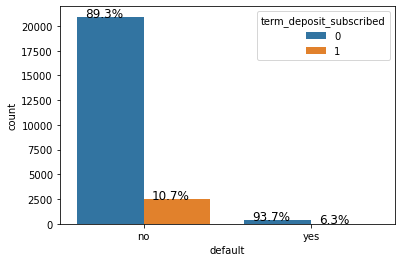

In [39]:
#count of default(deliquency status) wrt to the term_deposit_subscribed column. 
graph = sns.countplot(data=dataset, x="default", hue="term_deposit_subscribed", order = dataset['default'].value_counts().index)
with_hue(graph, dataset.default, 2, 2)

In [40]:
#it can be a kind of risk to approach the defaulters as they have low chances of subscribing ,also they have the pressure to repay their due amount. 

<AxesSubplot:ylabel='housing_loan'>

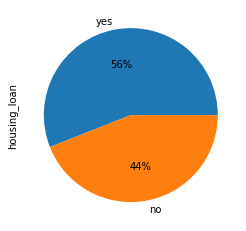

In [41]:
dataset['housing_loan'].value_counts().plot(kind='pie', autopct='%1.0f%%')

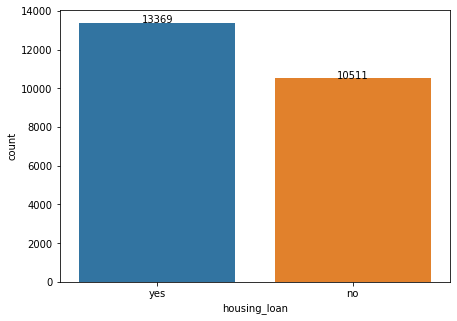

In [42]:
fig, ax1 = plt.subplots(figsize=(7,5))
graph = sns.countplot(ax=ax1, x='housing_loan', data=dataset, order = dataset['housing_loan'].value_counts().index)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        dataset['housing_loan'].value_counts()[i],ha="center")
    i += 1

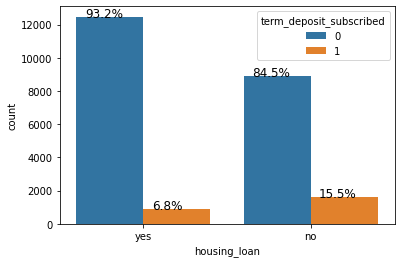

In [43]:
#count of housing_loan wrt to the term_deposit_subscribed column. 
graph = sns.countplot(data=dataset, x="housing_loan", hue="term_deposit_subscribed", order = dataset['housing_loan'].value_counts().index)
with_hue(graph, dataset.housing_loan, 2, 2)

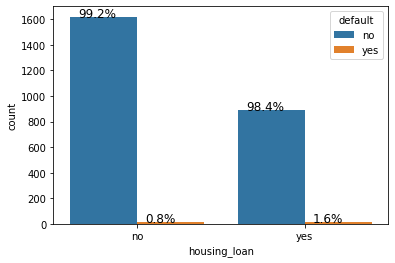

In [44]:
#count of housing_loan wrt to the default column. 
graph = sns.countplot(data=dataset_subscribed, x="housing_loan", hue="default", order = dataset_subscribed['housing_loan'].value_counts().index)
with_hue(graph, dataset_subscribed.housing_loan, 2, 2)

<AxesSubplot:ylabel='personal_loan'>

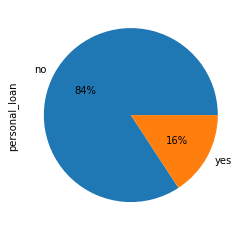

In [45]:
dataset['personal_loan'].value_counts().plot(kind='pie', autopct='%1.0f%%')

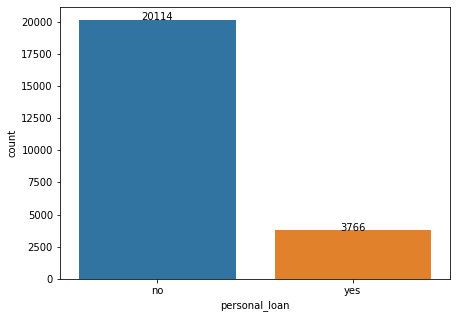

In [46]:
fig, ax1 = plt.subplots(figsize=(7,5))
graph = sns.countplot(ax=ax1, x='personal_loan', data=dataset, order = dataset['personal_loan'].value_counts().index)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        dataset['personal_loan'].value_counts()[i],ha="center")
    i += 1

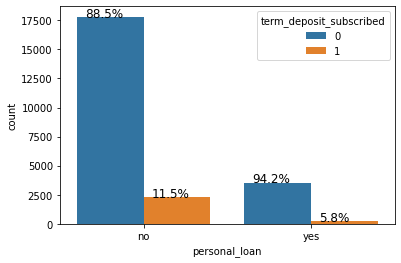

In [47]:
#count of personal_loan wrt to the term_deposit_subscribed column. 
graph = sns.countplot(data=dataset, x="personal_loan", hue="term_deposit_subscribed", order = dataset['personal_loan'].value_counts().index)
with_hue(graph, dataset.personal_loan, 2, 2)

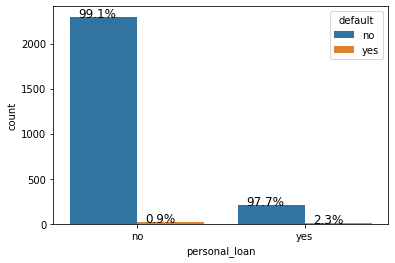

In [48]:
#count of housing_loan wrt to the default column. 
graph = sns.countplot(data=dataset_subscribed, x="personal_loan", hue="default", order = dataset_subscribed['housing_loan'].value_counts().index)
with_hue(graph, dataset_subscribed.personal_loan, 2, 2)

In [49]:
# here it is clearly evident that the customers having having any kind of loan and are in defaulter state have the minimal chances of subscribing.

<AxesSubplot:ylabel='communication_type'>

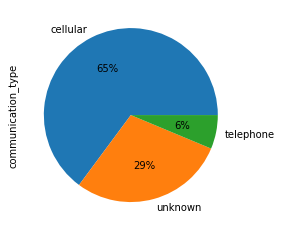

In [50]:
dataset['communication_type'].value_counts().plot(kind='pie', autopct='%1.0f%%')

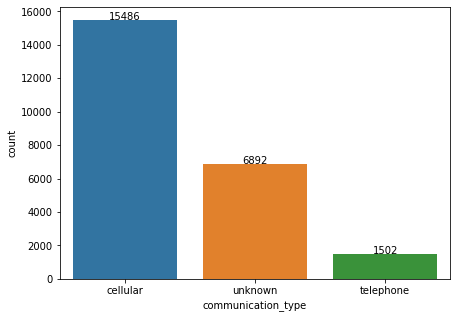

In [51]:
fig, ax1 = plt.subplots(figsize=(7,5))
graph = sns.countplot(ax=ax1, x='communication_type', data=dataset, order = dataset['communication_type'].value_counts().index)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        dataset['communication_type'].value_counts()[i],ha="center")
    i += 1

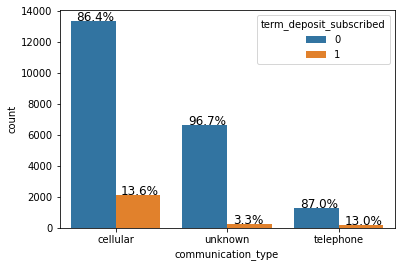

In [52]:
#count of communication_type wrt to the term_deposit_subscribed column. 
graph = sns.countplot(data=dataset, x="communication_type", hue="term_deposit_subscribed", order = dataset['communication_type'].value_counts().index)
with_hue(graph, dataset.communication_type, 3, 2)

In [53]:
#here for both the cellular as well as the telephone the subscribing percentage is almost same i.e it can be dropped .

<AxesSubplot:ylabel='month'>

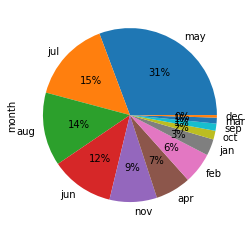

In [54]:
dataset['month'].value_counts().plot(kind='pie', autopct='%1.0f%%')

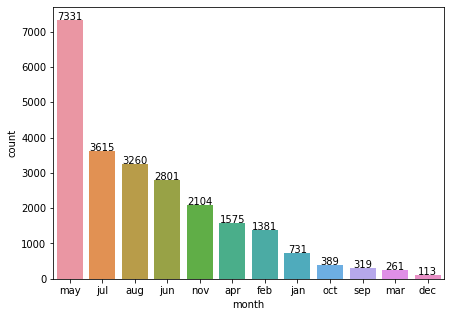

In [55]:
fig, ax1 = plt.subplots(figsize=(7,5))
graph = sns.countplot(ax=ax1, x='month', data=dataset, order = dataset['month'].value_counts().index)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        dataset['month'].value_counts()[i],ha="center")
    i += 1

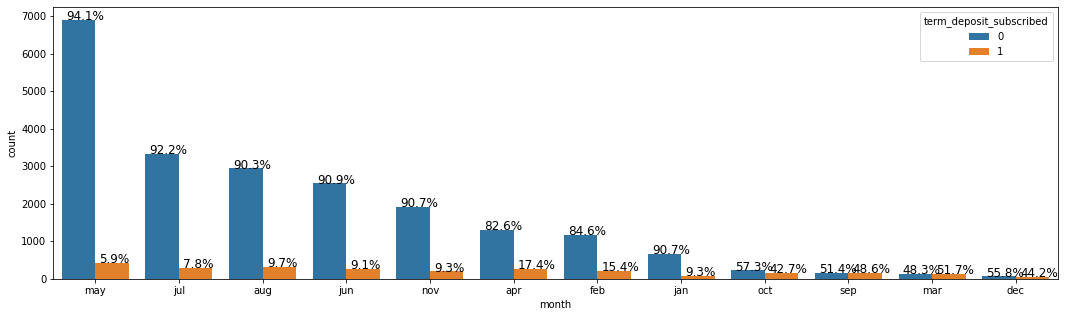

In [56]:
#count of month(month when customer was approached) wrt to the term_deposit_subscribed column. 
fig, ax1 = plt.subplots(figsize=(18,5))
graph = sns.countplot(ax=ax1, data=dataset, x="month", hue="term_deposit_subscribed", order = dataset['month'].value_counts().index)
with_hue(graph, dataset.month, 12, 2)

In [57]:
# From above plot,we can visualize that conversion upon approach ratio is highest in sep, mar month.Therefore ABC should increase its approaching customer in these month.

<AxesSubplot:ylabel='prev_campaign_outcome'>

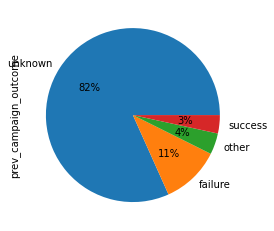

In [58]:
dataset['prev_campaign_outcome'].value_counts().plot(kind='pie', autopct='%1.0f%%')

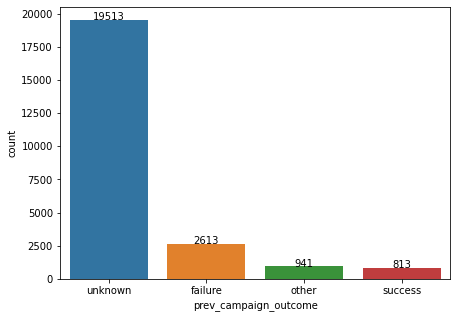

In [59]:
fig, ax1 = plt.subplots(figsize=(7,5))
graph = sns.countplot(ax=ax1, x='prev_campaign_outcome', data=dataset, order = dataset['prev_campaign_outcome'].value_counts().index)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        dataset['prev_campaign_outcome'].value_counts()[i],ha="center")
    i += 1

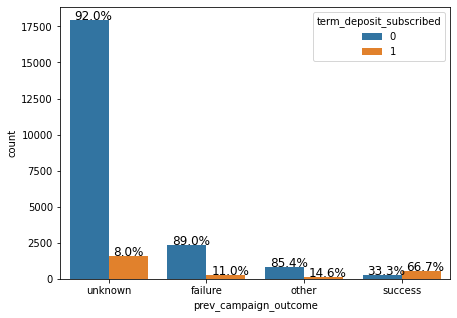

In [60]:
#count of prev_campaign_outcome wrt to the term_deposit_subscribed column. 
fig, ax1 = plt.subplots(figsize=(7,5))
graph = sns.countplot(ax=ax1, data=dataset, x="prev_campaign_outcome", hue="term_deposit_subscribed", order = dataset['prev_campaign_outcome'].value_counts().index)
with_hue(graph, dataset.prev_campaign_outcome, 4, 2)

In [61]:
#for the customers subscribed in the previous have the high chances of of subscribing in this campaign too.

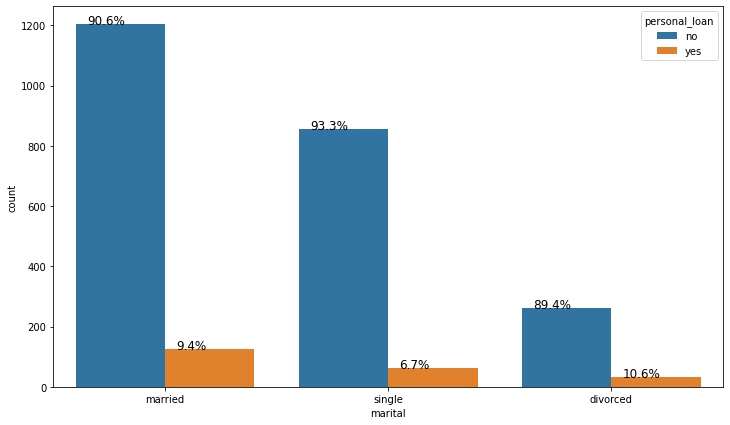

In [62]:
# count of marital status wrt to personal loan for the subscribed customers.
plt.figure(figsize=(12,7))
graph = sns.countplot(data=dataset_subscribed, x='marital', hue='personal_loan', order = dataset_subscribed['marital'].value_counts().index)
with_hue(graph, dataset_subscribed.marital, 3, 2)

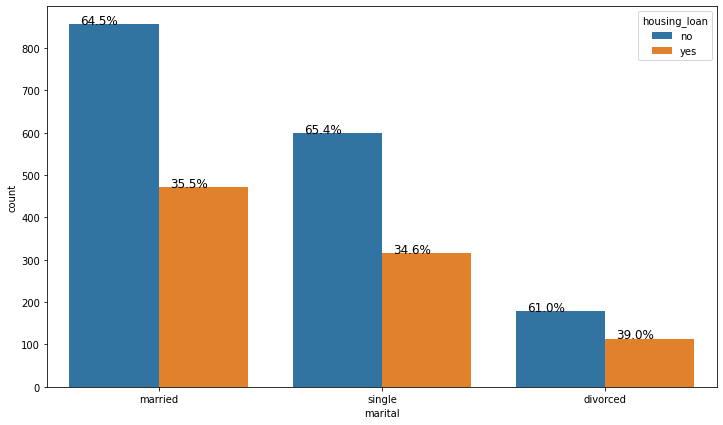

In [63]:
# count of marital status wrt to housing loan for the subscribed customers.
plt.figure(figsize=(12,7))
graph = sns.countplot(data=dataset_subscribed, x='marital', hue='housing_loan', order = dataset_subscribed['marital'].value_counts().index)
with_hue(graph, dataset_subscribed.marital, 3, 2)

In [64]:
# here the housing loan distrubion among the the marital status is same but in the personal loan "single " status should be preferred among all this.

<AxesSubplot:xlabel='marital', ylabel='balance'>

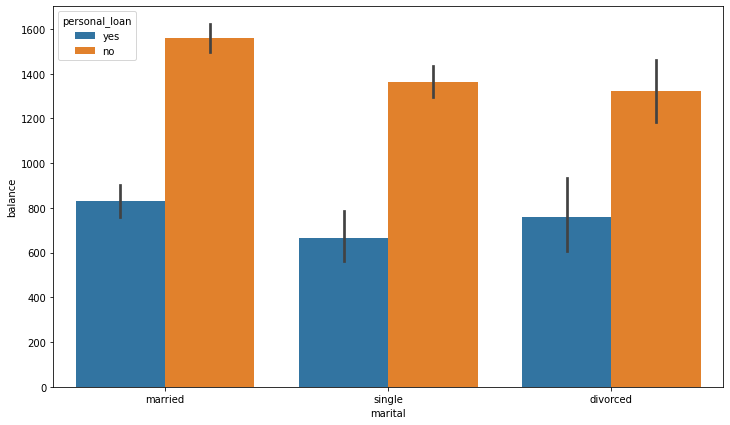

In [65]:
plt.figure(figsize=(12,7))
sns.barplot(data=dataset, x="marital", y="balance", hue="personal_loan")

<AxesSubplot:xlabel='marital', ylabel='balance'>

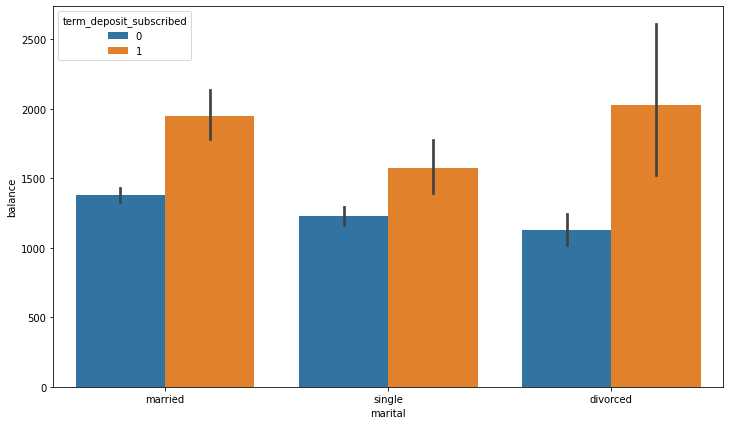

In [66]:
plt.figure(figsize=(12,7))
sns.barplot(data=dataset, x="marital", y="balance", hue="term_deposit_subscribed")

<AxesSubplot:xlabel='marital', ylabel='balance'>

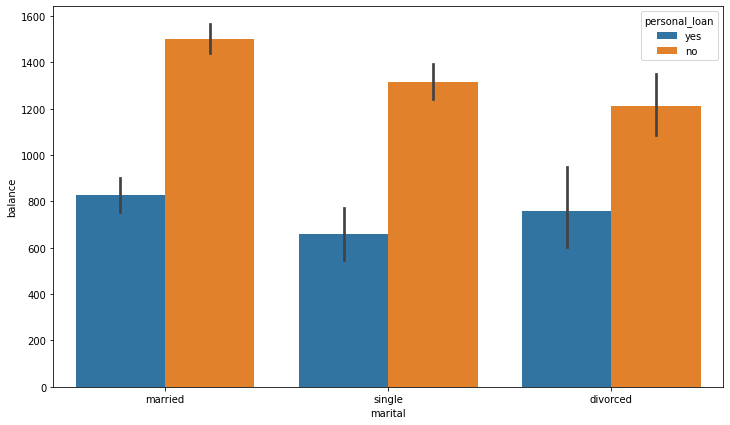

In [67]:
plt.figure(figsize=(12,7))
sns.barplot(data=dataset[dataset['term_deposit_subscribed'] == 0], x="marital", y="balance", hue="personal_loan")

<AxesSubplot:xlabel='marital', ylabel='balance'>

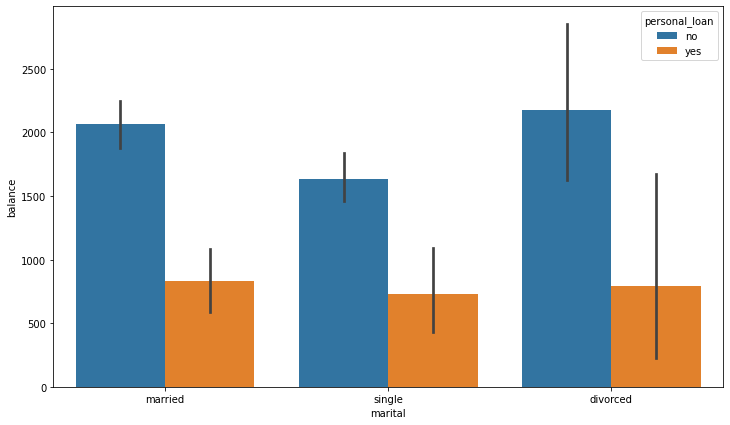

In [68]:
plt.figure(figsize=(12,7))
sns.barplot(data=dataset[dataset['term_deposit_subscribed'] == 1], x="marital", y="balance", hue="personal_loan")

<AxesSubplot:xlabel='education', ylabel='balance'>

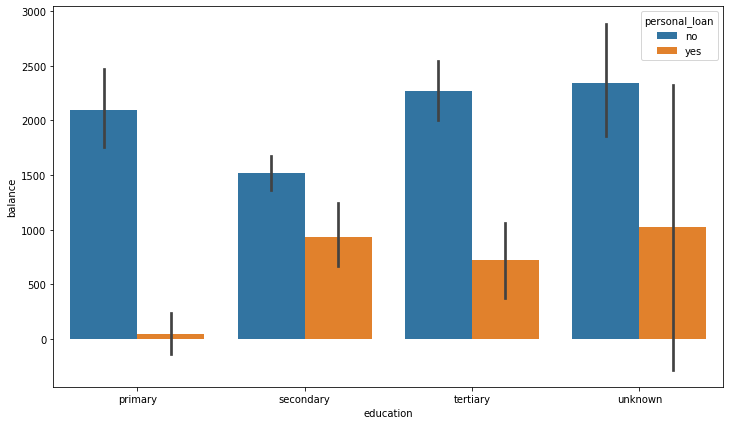

In [69]:
plt.figure(figsize=(12,7))
sns.barplot(data=dataset[dataset['term_deposit_subscribed'] == 1], x="education", y="balance", hue="personal_loan")

<AxesSubplot:xlabel='marital', ylabel='balance'>

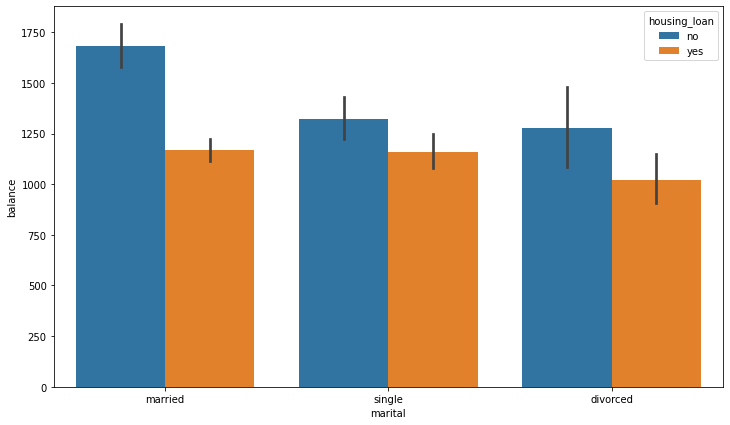

In [70]:
plt.figure(figsize=(12,7))
sns.barplot(data=dataset[dataset['term_deposit_subscribed'] == 0], x="marital", y="balance", hue="housing_loan")

<AxesSubplot:xlabel='education', ylabel='balance'>

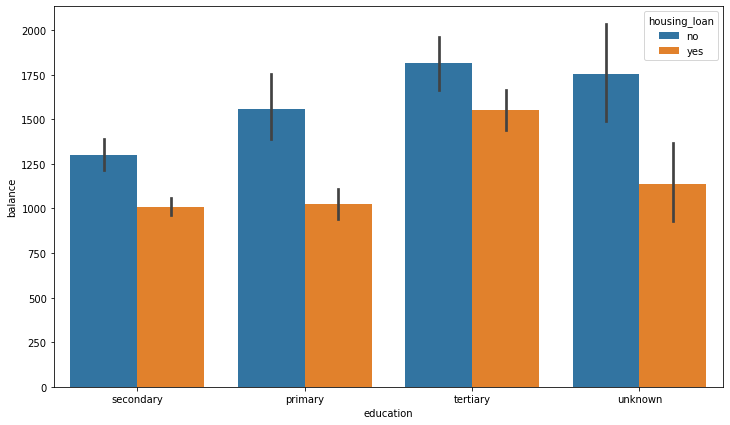

In [71]:
plt.figure(figsize=(12,7))
sns.barplot(data=dataset[dataset['term_deposit_subscribed'] == 0], x="education", y="balance", hue="housing_loan")

<Figure size 1440x1440 with 0 Axes>

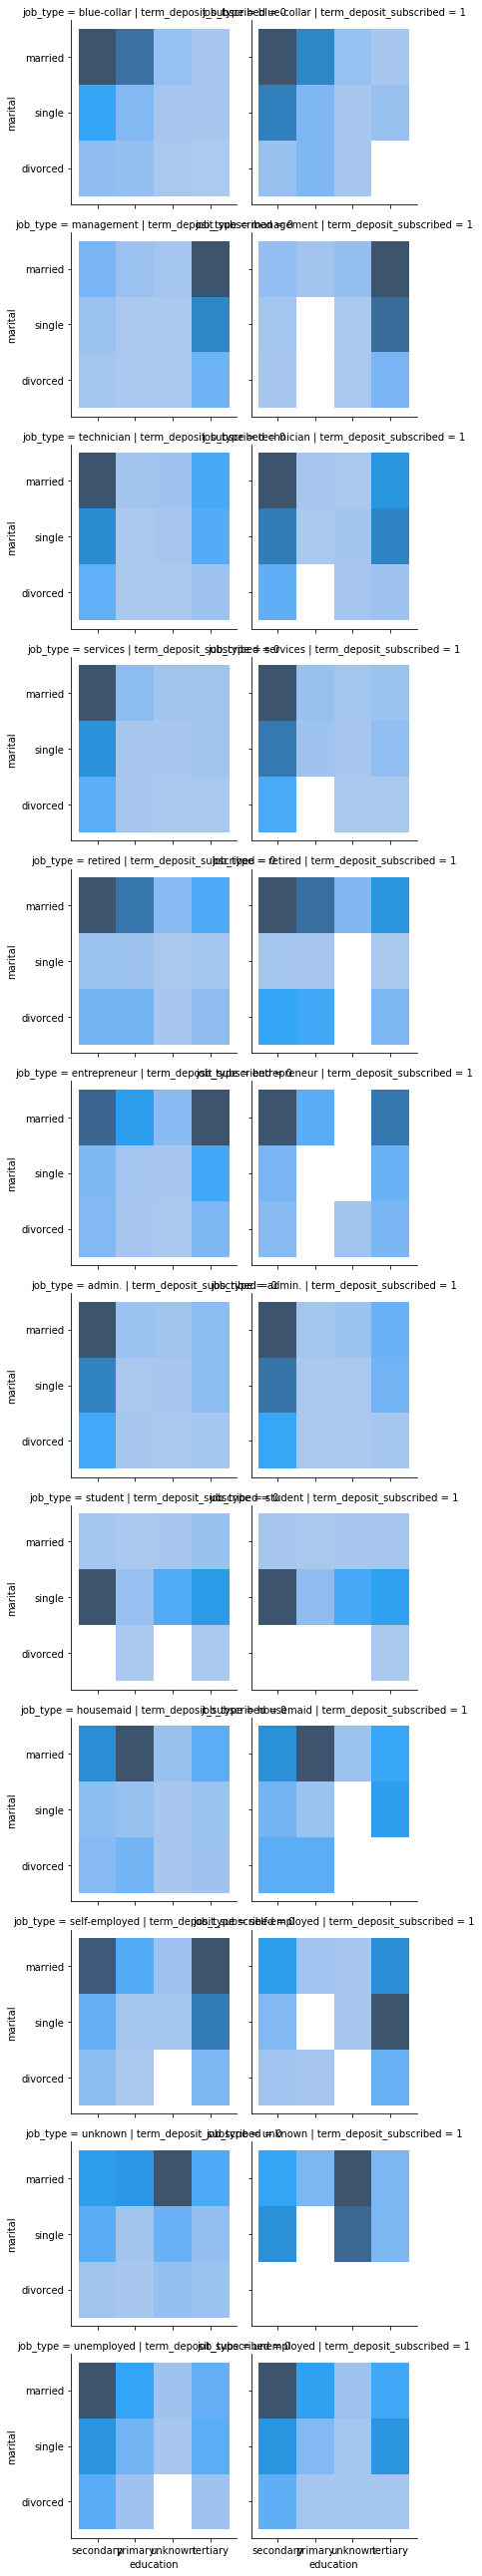

In [72]:
plt.figure(figsize=(20,20))
g = sns.FacetGrid(dataset, col='term_deposit_subscribed', row="job_type")
g.map(sns.histplot, "education","marital")

## Creating the Dummies for Categorical Columns

In [73]:
# Identifying categorical data columns
categorical_data = dataset.select_dtypes(include='object')

In [74]:
categorical_data.columns

Index(['customer_id', 'job_type', 'marital', 'education', 'default',
       'housing_loan', 'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

In [75]:
# Checking the different entry count in the each categorical_data columns

In [76]:
dataset['job_type'].value_counts()

blue-collar      5167
management       5006
technician       3978
admin.           2717
services         2224
retired          1176
self-employed     845
entrepreneur      773
unemployed        675
housemaid         663
student           502
unknown           154
Name: job_type, dtype: int64

In [77]:
dataset['marital'].value_counts()

married     14378
single       6707
divorced     2795
Name: marital, dtype: int64

In [78]:
dataset['education'].value_counts()

secondary    12330
tertiary      6993
primary       3571
unknown        986
Name: education, dtype: int64

In [79]:
dataset['default'].value_counts()

no     23452
yes      428
Name: default, dtype: int64

In [80]:
dataset['housing_loan'].value_counts()

yes    13369
no     10511
Name: housing_loan, dtype: int64

In [81]:
dataset['personal_loan'].value_counts()

no     20114
yes     3766
Name: personal_loan, dtype: int64

In [82]:
dataset['communication_type'].value_counts()

cellular     15486
unknown       6892
telephone     1502
Name: communication_type, dtype: int64

In [83]:
dataset['month'].value_counts()

may    7331
jul    3615
aug    3260
jun    2801
nov    2104
apr    1575
feb    1381
jan     731
oct     389
sep     319
mar     261
dec     113
Name: month, dtype: int64

In [84]:
dataset['prev_campaign_outcome'].value_counts()

unknown    19513
failure     2613
other        941
success      813
Name: prev_campaign_outcome, dtype: int64

In [85]:
# Assigning the dummies to entry of the job_type column

In [86]:
dataset_dummies = pd.get_dummies(dataset['job_type'], drop_first=True)

In [87]:
dataset_dummies.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0


In [88]:
# Assigning the dummies to entry of the marital column
dataset_dummies = pd.concat([dataset_dummies ,pd.get_dummies(dataset['marital'], drop_first=True)], axis=1)

In [89]:
# Assigning the dummies to entry of the education column
dataset_dummies = pd.concat([dataset_dummies ,pd.get_dummies(dataset['education'], drop_first=True)], axis=1)

In [90]:
# Assigning the dummies to entry of the deault column
dataset_dummies = pd.concat([dataset_dummies ,pd.get_dummies(dataset['default'], drop_first=True)], axis=1)

In [91]:
# Assigning the dummies to entry of the housing_loan column
dataset_dummies = pd.concat([dataset_dummies ,pd.get_dummies(dataset['housing_loan'], drop_first=True)], axis=1)

In [92]:
dataset_dummies.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,secondary,tertiary,unknown,yes,yes
0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [93]:
# Assigning the dummies to entry of the personal_loan column
dataset_dummies = pd.concat([dataset_dummies ,pd.get_dummies(dataset['personal_loan'], drop_first=True)], axis=1)

In [94]:
# Assigning the dummies to entry of the communication_type column
dataset_dummies = pd.concat([dataset_dummies ,pd.get_dummies(dataset['communication_type'], drop_first=True)], axis=1)

In [95]:
# Assigning the dummies to entry of the month column
dataset_dummies = pd.concat([dataset_dummies ,pd.get_dummies(dataset['month'], drop_first=True)], axis=1)

In [96]:
# Assigning the dummies to entry of the prev_campaign_outcome column
dataset_dummies = pd.concat([dataset_dummies ,pd.get_dummies(dataset['prev_campaign_outcome'], drop_first=True)], axis=1)

In [97]:
dataset_dummies.shape

(23880, 35)

In [98]:
# Separating the numerical data from given dataset
numerical_data = dataset.select_dtypes(exclude='object')

In [99]:
numerical_data.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
0,34.0,934.0,18,704,2.0,1,0
1,41.0,1352.0,13,893,2.0,0,0
2,57.0,495.0,18,796,4.0,0,1
3,37.0,650.0,26,880,1.0,0,0
4,29.0,265.0,19,795,2.0,0,0


In [100]:
numerical_data.shape

(23880, 7)

<AxesSubplot:>

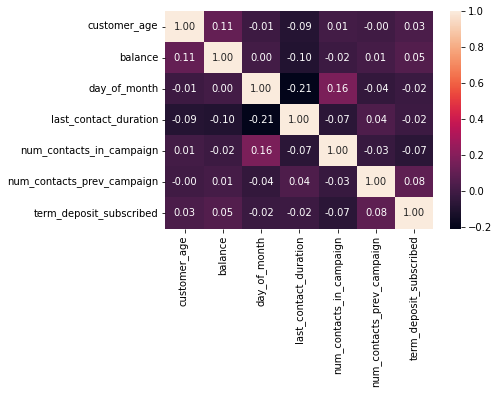

In [101]:
# Creating correlation heatmap
sns.heatmap(numerical_data.corr(), annot=True, fmt="0.2f")

<AxesSubplot:xlabel='customer_age', ylabel='balance'>

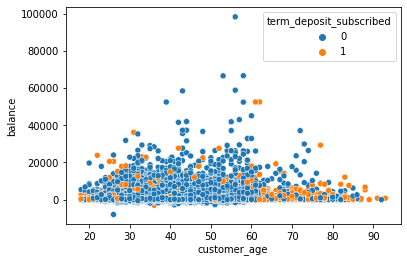

In [102]:
sns.scatterplot(data=dataset, x='customer_age', y='balance', hue='term_deposit_subscribed')

In [103]:
dataset[dataset['customer_age'] > 60]['term_deposit_subscribed'].value_counts()[1] / len(dataset[dataset['customer_age'] > 60])

0.35665294924554186

In [104]:
dataset[dataset['customer_age'] < 20]['term_deposit_subscribed'].value_counts()[1] / len(dataset[dataset['customer_age'] < 20])

0.3125

In [105]:
dataset[dataset['customer_age'] > 20]['term_deposit_subscribed'].value_counts()[1] / len(dataset[dataset['customer_age'] >20])

0.10530079932688262

In [106]:
#here we analysed that the customer of age group greater than 60 and less than 20 have the higher conversion rate. 

<AxesSubplot:xlabel='last_contact_duration', ylabel='day_of_month'>

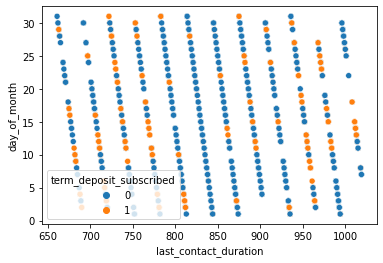

In [107]:
sns.scatterplot(data=dataset, x='last_contact_duration', y='day_of_month', hue='term_deposit_subscribed')

<AxesSubplot:xlabel='day_of_month', ylabel='last_contact_duration'>

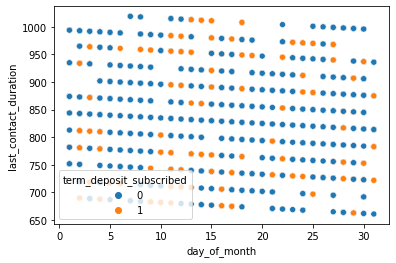

In [108]:
sns.scatterplot(data=dataset, y='last_contact_duration', x='day_of_month', hue='term_deposit_subscribed')

In [109]:
len(dataset[dataset['last_contact_duration'] > 950])

2267

In [110]:
dataset[dataset['last_contact_duration'] > 950]['term_deposit_subscribed'].value_counts()[1]

366

In [111]:
dataset[dataset['last_contact_duration'] < 820]['term_deposit_subscribed'].value_counts()[1] / len(dataset[dataset['last_contact_duration'] < 820])

0.1315272318921954

In [112]:
dataset[dataset['last_contact_duration'] > 820]['term_deposit_subscribed'].value_counts()[1] / len(dataset[dataset['last_contact_duration'] > 820])

0.09586319022099114

In [113]:
dataset[dataset['last_contact_duration'] > 950]['term_deposit_subscribed'].value_counts()[1] / len(dataset[dataset['last_contact_duration'] > 950])

0.16144684605205117

In [114]:
#The conversion rate is more for the contact duration less than 820 than last contacted duration greater than 820.Also it is preferable to choose the customers whose last contacted duration is greater than 950.

<AxesSubplot:xlabel='last_contact_duration', ylabel='balance'>

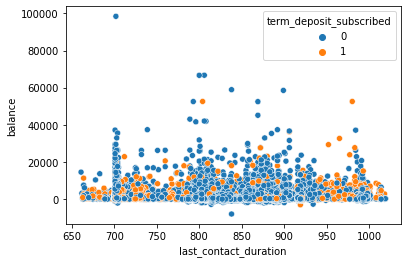

In [115]:
sns.scatterplot(data=dataset, x='last_contact_duration', y='balance', hue='term_deposit_subscribed')

<AxesSubplot:xlabel='last_contact_duration', ylabel='customer_age'>

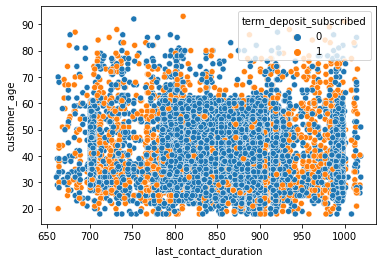

In [116]:
sns.scatterplot(data=dataset, x='last_contact_duration', y='customer_age', hue='term_deposit_subscribed')

<AxesSubplot:xlabel='day_of_month', ylabel='num_contacts_in_campaign'>

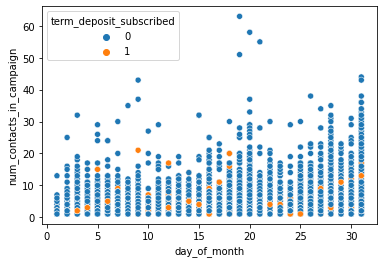

In [117]:
sns.scatterplot(data=dataset, x='day_of_month', y='num_contacts_in_campaign', hue='term_deposit_subscribed')

In [118]:
len(dataset[dataset['term_deposit_subscribed'] == 1]) / len(dataset)

0.10619765494137354

In [119]:
# Concatnating the dataset_dummies and numerical_data
dataset_dummies = pd.concat([dataset_dummies ,numerical_data], axis=1)

In [120]:
dataset_dummies.shape

(23880, 42)

In [121]:
# Droping the dependent column from the dataset
X = dataset_dummies.drop('term_deposit_subscribed', axis=1)

In [122]:
# Independent Column
X.columns

Index(['blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'married', 'single', 'secondary', 'tertiary', 'unknown',
       'yes', 'yes', 'yes', 'telephone', 'unknown', 'aug', 'dec', 'feb', 'jan',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success',
       'unknown', 'customer_age', 'balance', 'day_of_month',
       'last_contact_duration', 'num_contacts_in_campaign',
       'num_contacts_prev_campaign'],
      dtype='object')

In [123]:
# Assigning the dependent column of the dataset to y
y = dataset_dummies['term_deposit_subscribed']

In [124]:
y.value_counts()

0    21344
1     2536
Name: term_deposit_subscribed, dtype: int64

In [125]:
# Splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
X_train.shape, X_test.shape

((19104, 41), (4776, 41))

In [127]:
# Preprocessing the data through Standard Scaler customer_age, balance, day_of_month, last_contact_duration, num_contacts_in_campaign

In [128]:
from sklearn.preprocessing import StandardScaler
sc_age =  StandardScaler()
X_train.loc[:, ['customer_age']] = sc_age.fit_transform(X_train.loc[:, ['customer_age']])
X_test.loc[:, ['customer_age']] = sc_age.transform(X_test.loc[:, ['customer_age']])

In [129]:
from sklearn.preprocessing import StandardScaler
sc_balance =  StandardScaler()
X_train.loc[:, ['balance']] = sc_balance.fit_transform(X_train.loc[:, ['balance']])
X_test.loc[:, ['balance']] = sc_balance.transform(X_test.loc[:, ['balance']])

In [130]:
from sklearn.preprocessing import StandardScaler
sc_day_of_month =  StandardScaler()
X_train.loc[:, ['day_of_month']] = sc_day_of_month.fit_transform(X_train.loc[:, ['day_of_month']])
X_test.loc[:, ['day_of_month']] = sc_day_of_month.transform(X_test.loc[:, ['day_of_month']])

In [131]:
from sklearn.preprocessing import StandardScaler
sc_last_contact_duration =  StandardScaler()
X_train.loc[:, ['last_contact_duration']] = sc_last_contact_duration.fit_transform(X_train.loc[:, ['last_contact_duration']])
X_test.loc[:, ['last_contact_duration']] = sc_last_contact_duration.transform(X_test.loc[:, ['last_contact_duration']])

In [132]:
from sklearn.preprocessing import StandardScaler
sc_num_contacts_in_campaign =  StandardScaler()
X_train.loc[:, ['num_contacts_in_campaign']] = sc_num_contacts_in_campaign.fit_transform(X_train.loc[:, ['num_contacts_in_campaign']])
X_test.loc[:, ['num_contacts_in_campaign']] = sc_num_contacts_in_campaign.transform(X_test.loc[:, ['num_contacts_in_campaign']])

## Model Training

In [133]:
# training the model with sklearn's LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [134]:
# coefficient of logistic regression
log_reg_coef = log_reg.coef_

In [135]:
log_reg_coef = pd.Series(log_reg_coef[0])

In [136]:
log_reg_coef

0     0.155706
1     0.303029
2    -0.027282
3     0.100922
4     0.565943
5     0.327275
6     0.167209
7     0.381591
8     0.135487
9     0.343263
10    0.179006
11   -0.178986
12    0.105495
13    0.186162
14    0.284873
15    0.113152
16   -0.080848
17   -0.561621
18   -0.486945
19   -0.214607
20   -1.331475
21   -0.964106
22    0.458307
23   -0.165498
24   -0.929434
25   -0.868231
26    0.055530
27    1.487770
28   -0.472350
29   -1.105821
30    0.482033
31    0.822123
32    0.204161
33    2.516064
34    0.101202
35    0.036024
36    0.037574
37    0.065583
38   -0.122009
39   -0.342411
40    0.007786
dtype: float64

In [137]:
# intercept of the logistic regression model
log_reg.intercept_

array([-1.71245441])

In [138]:
# features used in logistic regression
log_reg.feature_names_in_

array(['blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown', 'married', 'single', 'secondary',
       'tertiary', 'unknown', 'yes', 'yes', 'yes', 'telephone', 'unknown',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'other', 'success', 'unknown', 'customer_age',
       'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign'],
      dtype=object)

In [139]:
log_reg_feature = pd.Series(log_reg.feature_names_in_)

In [140]:
log_reg_feature

0                    blue-collar
1                   entrepreneur
2                      housemaid
3                     management
4                        retired
5                  self-employed
6                       services
7                        student
8                     technician
9                     unemployed
10                       unknown
11                       married
12                        single
13                     secondary
14                      tertiary
15                       unknown
16                           yes
17                           yes
18                           yes
19                     telephone
20                       unknown
21                           aug
22                           dec
23                           feb
24                           jan
25                           jul
26                           jun
27                           mar
28                           may
29                           nov
30        

In [141]:
log_reg_coef_df = pd.concat([log_reg_feature, log_reg_coef], axis=1)
log_reg_coef_df

,0,1
0,blue-collar,0.155706
1,entrepreneur,0.303029
2,housemaid,-0.027282
3,management,0.100922
4,retired,0.565943
5,self-employed,0.327275
6,services,0.167209
7,student,0.381591
8,technician,0.135487
9,unemployed,0.343263


In [142]:
from sklearn.feature_selection import RFE
predictors = X_train
selector = RFE(log_reg, n_features_to_select=1)
selector = selector.fit(predictors, y_train)

In [143]:
order = selector.ranking_
order

array([28, 20, 40, 30, 12, 16, 27, 17, 29, 19, 26, 15, 35, 24, 23, 25, 31,
        5, 10, 18,  4,  7, 36, 32,  6,  8, 33,  2, 11,  9, 21,  3, 22,  1,
       34, 39, 38, 37, 14, 13, 41])

In [144]:
feature_ranks = []
for i in order:
  feature_ranks.append(f"{i}. {dataset_dummies.columns[i]}")

feature_ranks

['28. may',
 '20. unknown',
 '40. num_contacts_prev_campaign',
 '30. oct',
 '12. single',
 '16. yes',
 '27. mar',
 '17. yes',
 '29. nov',
 '19. telephone',
 '26. jun',
 '15. unknown',
 '35. customer_age',
 '24. jan',
 '23. feb',
 '25. jul',
 '31. sep',
 '5. self-employed',
 '10. unknown',
 '18. yes',
 '4. retired',
 '7. student',
 '36. balance',
 '32. other',
 '6. services',
 '8. technician',
 '33. success',
 '2. housemaid',
 '11. married',
 '9. unemployed',
 '21. aug',
 '3. management',
 '22. dec',
 '1. entrepreneur',
 '34. unknown',
 '39. num_contacts_in_campaign',
 '38. last_contact_duration',
 '37. day_of_month',
 '14. tertiary',
 '13. secondary',
 '41. term_deposit_subscribed']

In [145]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(log_reg, threshold=-np.inf, max_features=21)
smf.fit(X_train, y_train)
feature_idx = smf.get_support()
feature_name = X_train.columns[feature_idx]
feature_name

Index(['entrepreneur', 'retired', 'self-employed', 'student', 'unemployed',
       'tertiary', 'yes', 'yes', 'telephone', 'unknown', 'aug', 'dec', 'jan',
       'jul', 'mar', 'may', 'nov', 'oct', 'sep', 'success',
       'num_contacts_in_campaign'],
      dtype='object')

In [146]:
y_train_pred = log_reg.predict(X_train)

In [147]:
# Checking the accuracy on train data using logistic Regression(log_reg)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.9056218592964824

In [148]:
y_test_pred = log_reg.predict(X_test)

In [149]:
# Checking the accuracy on test data using logistic Regression(log_reg)
accuracy_score(y_test, y_test_pred)

0.9005443886097152

In [150]:
# training the model with sklearn's RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier
# forest = RandomForestClassifier()
# forest.fit(X_train, y_train)

In [151]:
# y_train_pred_forest = forest.predict(X_train)

In [152]:
# Checking the accuracy on train data using Random Forest(forest)
# accuracy_score(y_train, y_train_pred_forest)

In [153]:
# y_test_pred_forest = forest.predict(X_test)

In [154]:
# Checking the accuracy on test data using Random Forest(forest)
# accuracy_score(y_test, y_test_pred_forest)

In [155]:
# training the model with sklearn's SVc
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(X_train, y_train)
# y_train_pred_svc = svc.predict(X_train)
# y_test_pred_svc = svc.predict(X_test)

In [156]:
# Checking the accuracy on train data using SVC
# accuracy_score(y_train, y_train_pred_svc)

In [157]:
# Checking the accuracy on test data using SVC
# accuracy_score(y_test, y_test_pred_svc)

## Selecting Top 1000 customer for campaign

In [158]:
# Loading new_customer_list dataset(Dataset for selecting 1000 customer)
new_customer = pd.read_excel("New_customer_list_data.xlsx")
new_customer.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure


In [159]:
new_customer.describe()

,customer_age,balance,last_contact_duration,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign
count,7625.000000,7645.000000,7767.000000,7767.000000,7751.000000,7767.000000
mean,40.575475,1380.914454,854.417536,15.886958,2.780544,0.615553
std,10.745877,3280.231914,74.628693,8.328768,3.169323,2.069363
min,18.000000,-4062.000000,663.000000,1.000000,1.000000,0.000000
25%,32.000000,74.000000,809.000000,8.000000,1.000000,0.000000
50%,39.000000,465.000000,871.000000,16.000000,2.000000,0.000000
75%,48.000000,1429.000000,897.000000,21.000000,3.000000,0.000000
max,97.000000,102128.000000,1020.000000,31.000000,46.000000,55.000000


In [160]:
# Checking the null value
new_customer.isna().sum()

customer_id                     0
customer_age                  142
job_type                        0
marital                        43
education                       0
default                         0
balance                       122
housing_loan                    0
personal_loan                  36
communication_type              0
last_contact_duration           0
day_of_month                    0
month                           0
num_contacts_in_campaign       16
num_contacts_prev_campaign      0
prev_campaign_outcome           0
dtype: int64

In [161]:
new_customer.loc[:,['customer_age']] = imp_age.transform(new_customer.loc[:,['customer_age']])

In [162]:
new_customer.loc[:,['marital']] = imp_marital.transform(new_customer.loc[:,['marital']])

In [163]:
new_customer.loc[:,['balance']] = imp_balance.transform(new_customer.loc[:,['balance']])

In [164]:
new_customer.loc[:,['personal_loan']] = imp_loan.transform(new_customer.loc[:,['personal_loan']])

<AxesSubplot:xlabel='num_contacts_in_campaign', ylabel='Count'>

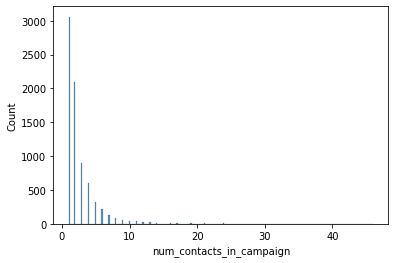

In [165]:
sns.histplot(data=new_customer, x='num_contacts_in_campaign')

In [166]:
new_customer.loc[:,["num_contacts_in_campaign"]] = imp_num_contacts.transform(new_customer.loc[:,["num_contacts_in_campaign"]])

In [167]:
new_customer.isnull().sum()

customer_id                   0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
last_contact_duration         0
day_of_month                  0
month                         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
dtype: int64

In [168]:
new_customers_dummies = pd.get_dummies(new_customer['job_type'], drop_first=True)

In [169]:
new_customers_dummies = pd.concat([new_customers_dummies, pd.get_dummies(new_customer['marital'], drop_first=True)], axis=1)

In [170]:
new_customers_dummies = pd.concat([new_customers_dummies, pd.get_dummies(new_customer['education'], drop_first=True)], axis=1)

In [171]:
new_customers_dummies = pd.concat([new_customers_dummies, pd.get_dummies(new_customer['default'], drop_first=True)], axis=1)

In [172]:
new_customers_dummies = pd.concat([new_customers_dummies, pd.get_dummies(new_customer['housing_loan'], drop_first=True)], axis=1)

In [173]:
new_customers_dummies = pd.concat([new_customers_dummies, pd.get_dummies(new_customer['personal_loan'], drop_first=True)], axis=1)

In [174]:
new_customers_dummies = pd.concat([new_customers_dummies, pd.get_dummies(new_customer['communication_type'], drop_first=True)], axis=1)

In [175]:
new_customers_dummies = pd.concat([new_customers_dummies, pd.get_dummies(new_customer['month'], drop_first=True)], axis=1)

In [176]:
new_customers_dummies = pd.concat([new_customers_dummies, pd.get_dummies(new_customer['prev_campaign_outcome'], drop_first=True)], axis=1)

In [177]:
new_customers_dummies.shape

(7767, 35)

In [178]:
new_customer_numerical_data = new_customer.select_dtypes(exclude='object')

In [179]:
new_customer_numerical_data.head()

,customer_age,balance,last_contact_duration,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign
0,28.0,285.0,849,26,4.0,0
1,46.0,656.0,990,5,4.0,0
2,34.0,2.0,886,20,3.0,0
3,65.0,2880.0,913,23,1.0,0
4,52.0,1779.0,703,19,3.0,1


In [180]:
new_customer_numerical_data.shape

(7767, 6)

In [181]:
new_customers_dummies = pd.concat([new_customers_dummies, new_customer_numerical_data], axis=1)

In [182]:
new_customers_dummies.shape

(7767, 41)

In [183]:
new_customers_dummies.loc[:,['customer_age']] = sc_age.transform(new_customers_dummies.loc[:,['customer_age']])

In [184]:
new_customers_dummies.loc[:,['balance']] = sc_balance.transform(new_customers_dummies.loc[:,['balance']])

In [185]:
new_customers_dummies.loc[:,['day_of_month']] = sc_day_of_month.transform(new_customers_dummies.loc[:,['day_of_month']])

In [186]:
new_customers_dummies.loc[:,['last_contact_duration']] = sc_last_contact_duration.transform(new_customers_dummies.loc[:,['last_contact_duration']])

In [187]:
new_customers_dummies.loc[:,['num_contacts_in_campaign']] = sc_num_contacts_in_campaign.transform(new_customers_dummies.loc[:,['num_contacts_in_campaign']])

In [188]:
# Predicting the probability of (not subscribing)/subscribing in new_customer_list using logistic Regression(log_reg)
new_customer_predict_prob = log_reg.predict_proba(new_customers_dummies)

In [189]:
new_customer_predict_prob

array([[0.96443876, 0.03556124],
       [0.81442895, 0.18557105],
       [0.97379147, 0.02620853],
       ...,
       [0.95755909, 0.04244091],
       [0.97491059, 0.02508941],
       [0.86819848, 0.13180152]])

In [190]:
log_reg.classes_

array([0, 1], dtype=int64)

In [191]:
# Probability of subscribing
new_customer_predict_prob[:,1]

array([0.03556124, 0.18557105, 0.02620853, ..., 0.04244091, 0.02508941,
       0.13180152])

In [192]:
type(new_customer_predict_prob)

numpy.ndarray

In [193]:
# Convering the predicted probability(numby array) into pandas series
new_customer_predict_prob_series = pd.Series(new_customer_predict_prob[:,1])

In [194]:
type(new_customer_predict_prob_series)

pandas.core.series.Series

In [195]:
# Separating the customer_id from the new_customer dataset
new_customer_id = new_customer['customer_id']

In [196]:
type(new_customer_id)

pandas.core.series.Series

In [197]:
len(new_customer_predict_prob_series)

7767

In [198]:
len(new_customer_id)

7767

In [199]:
new_customer_id.head()

0    id_43823
1    id_10523
2    id_43951
3    id_12681
4     id_2153
Name: customer_id, dtype: object

In [200]:
# Concatenating the new_customer_id with their probality of subscribing
new_customer_pred_df = pd.concat([new_customer_id, new_customer_predict_prob_series], axis=1)

In [201]:
new_customer_pred_df.head()

,customer_id,0
0,id_43823,0.035561
1,id_10523,0.185571
2,id_43951,0.026209
3,id_12681,0.271827
4,id_2153,0.062394


In [202]:
# Giving the name to the concatenated subscribing probility column 
new_customer_pred_df.columns = ['customer_id', 'probability_1']

In [203]:
new_customer_pred_df.head()

,customer_id,probability_1
0,id_43823,0.035561
1,id_10523,0.185571
2,id_43951,0.026209
3,id_12681,0.271827
4,id_2153,0.062394


In [204]:
# Sorting the dataframe according to probability column in descending order
new_customer_pred_df_final = new_customer_pred_df.sort_values(by=['probability_1'], ascending=False)

In [205]:
new_customer_pred_df_final.head()

,customer_id,probability_1
3922,id_27675,0.970520
6739,id_30515,0.959861
1114,id_31705,0.958568
1664,id_42117,0.955149
2887,id_9610,0.953796


In [206]:
new_customer_pred_df_final.shape

(7767, 2)

In [207]:
# Separating the top 1000 rows with highest probability of subscribing
top_1000 = new_customer_pred_df_final.head(1000)

In [208]:
top_1000.shape

(1000, 2)

In [209]:
top_1000.head(100)

,customer_id,probability_1
3922,id_27675,0.970520
6739,id_30515,0.959861
1114,id_31705,0.958568
1664,id_42117,0.955149
2887,id_9610,0.953796
...,...,...
3865,id_22679,0.780735
4996,id_14580,0.779397
2676,id_24277,0.778751
4749,id_42319,0.777591


In [210]:
top_1000_customer_id = top_1000['customer_id']

In [211]:
top_1000_customer_id.head(100)

3922    id_27675
6739    id_30515
1114    id_31705
1664    id_42117
2887     id_9610
          ...   
3865    id_22679
4996    id_14580
2676    id_24277
4749    id_42319
4214     id_2515
Name: customer_id, Length: 100, dtype: object

In [212]:
type(top_1000_customer_id)

pandas.core.series.Series

In [215]:
top_1000_customer_id.to_csv(r'final_list.csv', index=False)

                                           THANK YOU                  